In [40]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [41]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [25]:
keys = get_keys("/Users/sofiaproano/.secret/yelp_api.json")

api_key = keys['api_key']

In [42]:
url = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': 'Bearer {}'.format(api_key),}
url_parameters = {'location': 'Jackson Heights',
                'term' : "restaurants, indian",
                'limit' : 50}
response = requests.get(url, headers=headers, params=url_parameters)
print(response)

<Response [200]>


In [43]:
response.json()['total']

261

In [44]:
def yelp_call_into_df(url_parameter, api_key):
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key),}
    response = requests.get(url, headers=headers, params=url_parameter)
    yelp_df = pd.DataFrame.from_dict(response.json()['businesses'])
    return yelp_df

In [45]:
df1 = yelp_call_into_df(url_parameters, api_key)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             50 non-null     object 
 1   alias          50 non-null     object 
 2   name           50 non-null     object 
 3   image_url      50 non-null     object 
 4   is_closed      50 non-null     bool   
 5   url            50 non-null     object 
 6   review_count   50 non-null     int64  
 7   categories     50 non-null     object 
 8   rating         50 non-null     float64
 9   coordinates    50 non-null     object 
 10  transactions   50 non-null     object 
 11  price          40 non-null     object 
 12  location       50 non-null     object 
 13  phone          50 non-null     object 
 14  display_phone  50 non-null     object 
 15  distance       50 non-null     float64
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 6.0+ KB


In [46]:
def yelp_pages_df(url_parameters, api_key):
    df_list = []
    current_results = 0
    total_results = response.json()['total']
    while current_results < total_results and current_results < 1000:
        url_parameters['offset'] = current_results
        df_list.append(yelp_call_into_df(url_parameters, api_key))
        time.sleep(1)
        current_results += 50
    df=pd.concat(df_list, ignore_index=True)
    return df

In [47]:
df_2=yelp_pages_df(url_parameters, api_key)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             85 non-null     object 
 1   alias          85 non-null     object 
 2   name           85 non-null     object 
 3   image_url      85 non-null     object 
 4   is_closed      85 non-null     bool   
 5   url            85 non-null     object 
 6   review_count   85 non-null     int64  
 7   categories     85 non-null     object 
 8   rating         85 non-null     float64
 9   coordinates    85 non-null     object 
 10  transactions   85 non-null     object 
 11  price          69 non-null     object 
 12  location       85 non-null     object 
 13  phone          85 non-null     object 
 14  display_phone  85 non-null     object 
 15  distance       85 non-null     float64
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 10.2+ KB


In [48]:
response.json()['total']
#df_2.tail()

261

In [97]:
new_df = df_2[['name', 'review_count', 'rating', 'price']]
df_under_85 = new_df[new_df['review_count']<= 85]
df_over_85= new_df[(new_df['review_count']>85) & (new_df['review_count']< 500)]

In [98]:
df_over_85.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 2 to 72
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          37 non-null     object 
 1   review_count  37 non-null     int64  
 2   rating        37 non-null     float64
 3   price         37 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.4+ KB


In [99]:
display(df_under_85.groupby('rating').mean()['review_count'])
df_over_85.groupby('rating').mean()['review_count']

rating
2.0     3.000000
2.5    17.428571
3.0    42.750000
3.5    41.285714
4.0    41.000000
4.5    29.285714
5.0    21.000000
Name: review_count, dtype: float64

rating
3.0    212.400000
3.5    278.000000
4.0    201.894737
4.5    233.444444
Name: review_count, dtype: float64

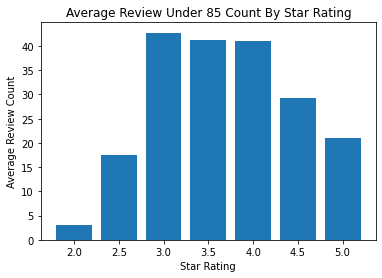

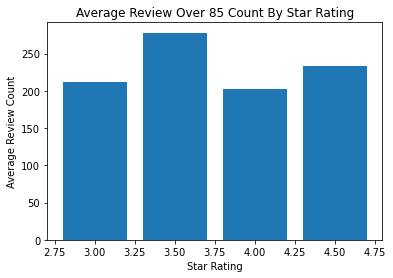

In [104]:
fig, ax = plt.subplots()
height =  df_under_85.groupby('rating').mean()['review_count']
x = height.index
ax.bar(x,height, width=0.4)
ax.set_title('Average Review Under 85 Count By Star Rating')
ax.set_ylabel('Average Review Count')
ax.set_xlabel('Star Rating');

fig, ax = plt.subplots()
height2 = df_over_85.groupby('rating').mean()['review_count']
x2 = height2.index
ax.bar(x2,height2, width=0.4)
ax.set_title('Average Review Over 85 Count By Star Rating')
ax.set_ylabel('Average Review Count')
ax.set_xlabel('Star Rating');

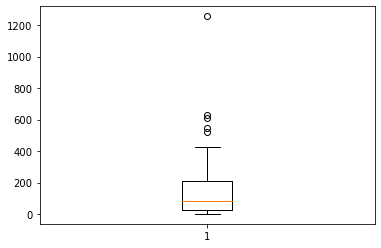

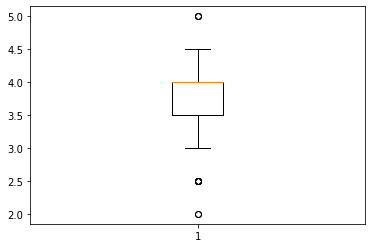

In [101]:
fig5, ax5 = plt.subplots()
ax5.boxplot(new_df['review_count'], showfliers=True);
fig6, ax6 = plt.subplots()
ax6.boxplot(new_df['rating']);